In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from classifiers.neural_net import TwoLayerNet

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size,hidden_size,num_classes,std = 1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [9]:
print(net.loss(X))#y为None 输出scores
print(y)
print(np.argmax(net.loss(X),axis = 1 ))

[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
[0 1 2 2 1]
[2 0 0 0 0]


In [13]:
loss, grads = net.loss(X,y,reg = 0.1)
print(loss)
print('W1:',grads['W1'])
print('W2:',grads['W2'])
print('b1:',grads['b1'])
print('b2:',grads['b2'])

1.30378789133
W1: [[ -9.68499043e-02   4.00157208e-03  -2.05517828e-01   1.87986352e-01
    1.60531645e-01  -9.77277880e-03   9.50088418e-03   2.68884345e-03
   -3.01022811e-02  -5.67802801e-03]
 [  4.45595008e-02   1.45427351e-02   6.95515502e-01  -2.88616327e-01
   -2.66986989e-01   3.33674327e-03   1.49407907e-02   1.93435586e-02
   -6.54700997e-02  -5.32928651e-01]
 [  1.16977821e-02   6.53618595e-03  -2.31623550e-01  -6.26390355e-02
   -1.41638971e-03  -1.45436567e-02   4.57585173e-04  -2.90067077e-03
    5.35668029e-01   3.69731998e-01]
 [  7.71766403e-02   3.78162520e-03  -3.13778323e-01   2.26868568e-01
    2.06678709e-01   1.56348969e-03   1.23029068e-02  -2.18055786e-03
   -6.78943040e-01   9.85573015e-02]]
W2: [[ -5.13764691e-01   1.67232930e-01   3.04783350e-01]
 [  1.95077540e-02  -5.09652182e-03  -4.38074302e-03]
 [  2.92229174e-01   1.18896894e-01  -4.32018096e-01]
 [ -2.33121075e-01   1.86288200e-01   3.96198312e-02]
 [  7.78174796e-01  -3.54233027e-01  -4.41137965e-01]

Final training loss:  0.0171377983058


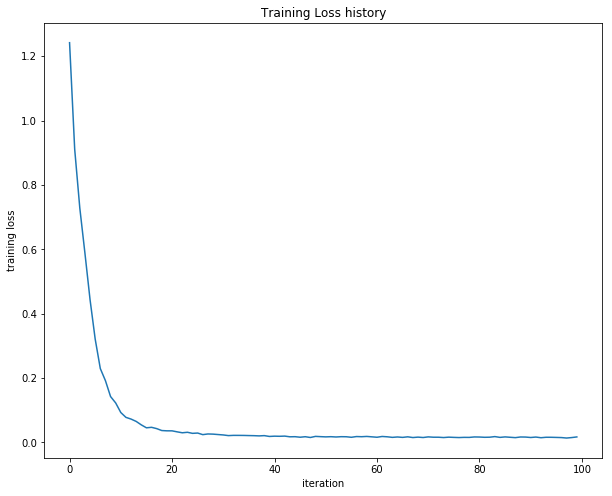

In [22]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-7,
            num_iters=100, verbose=False)#结构比较简单 结构复杂度reg越小越好

print ('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [25]:
from data_utils import load_CIFAR10

root = 'E:\jupyter\CS231n\Assignment1\data\cifar-10-batches-py'
X_train,Y_train,X_test,Y_test = load_CIFAR10(root)

num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
#create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.

mask = range(num_training,num_training + num_validation)
X_val = X_train[mask]
Y_val = Y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
Y_train = Y_train[mask]
#print(mask)
mask = range(num_test)
X_test = X_test[mask]
Y_test = Y_test[mask]

mask = np.random.choice(num_training,num_dev,replace = False)
X_dev = X_train[mask]
Y_dev = Y_train[mask]

X_train = X_train.reshape(num_training,-1)
X_test = X_test.reshape(num_test,-1)
X_val = X_val.reshape(num_validation,-1)
X_dev = X_dev.reshape(num_dev,-1)

# Normalize the data: subtract the mean image
mean_image = np.mean(X_train,axis = 0)
X_train -= mean_image
X_test -= mean_image
X_val -= mean_image
X_dev -= mean_image

# #add bias
# X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])#hstack水平存储
# X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
# X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
# X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', Y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', Y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)
print ('Dev data shape: ', X_dev.shape)
print ('Dev labels shape: ', Y_dev.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
Dev data shape:  (500, 3072)
Dev labels shape:  (500,)


In [27]:
#train a network
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

net = TwoLayerNet(input_size,hidden_size,num_classes)
states = net.train(X_train,Y_train,X_val,Y_val,learning_rate = 1e-3,learning_rate_decay=0.95
                   ,reg=1e-5,num_iters=1000,batch_size=200,verbose=True)

train_acc = states['train_acc_history'][-1]
val_acc = states['val_acc_history'][-1]
print('train_acc:',train_acc)
print('val_acc:',val_acc)

iteration 0 / 1000 : loss 2.302614
iteration 100 / 1000 : loss 1.887698
iteration 200 / 1000 : loss 1.787707
iteration 300 / 1000 : loss 1.758613
iteration 400 / 1000 : loss 1.621000
iteration 500 / 1000 : loss 1.562549
iteration 600 / 1000 : loss 1.316075
iteration 700 / 1000 : loss 1.579712
iteration 800 / 1000 : loss 1.485132
iteration 900 / 1000 : loss 1.427392
train_acc: 0.585
val_acc: 0.467


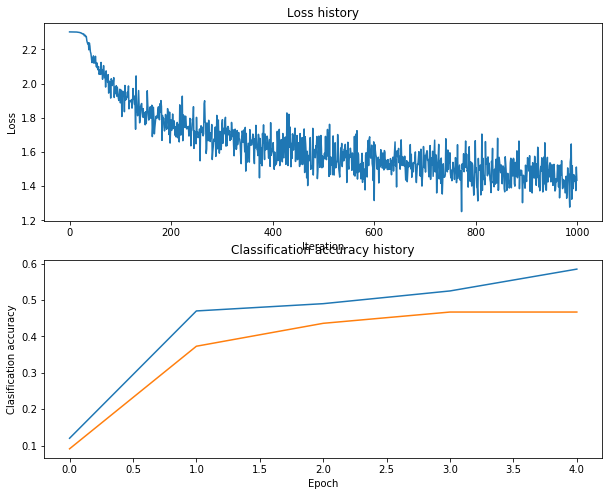

In [29]:
plt.subplot(2, 1, 1)
plt.plot(states['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(states['train_acc_history'], label='train')
plt.plot(states['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

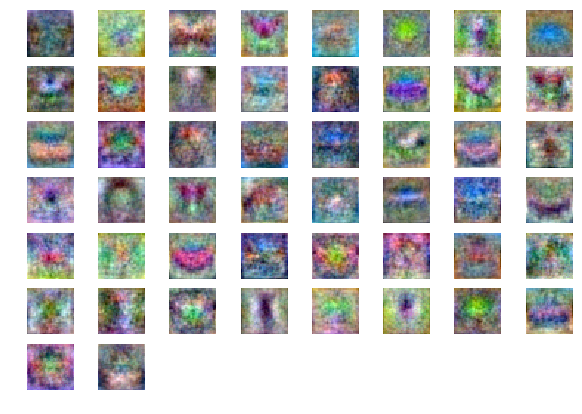

In [41]:
W1 = net.params['W1']
W2 = net.params['W2']

W1 = W1.reshape(32,32,3,-1).transpose(3, 0, 1, 2)
#W1_min, W1_max = np.min(W1), np.max(W1)
for i in range(50):
    plt.subplot(8,8,i+1)
    wimg = 255.0 * (W1[i,:, :, :].squeeze() - np.min(W1[i])) / (np.max(W1[i]) - np.min(W1[i]))
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')


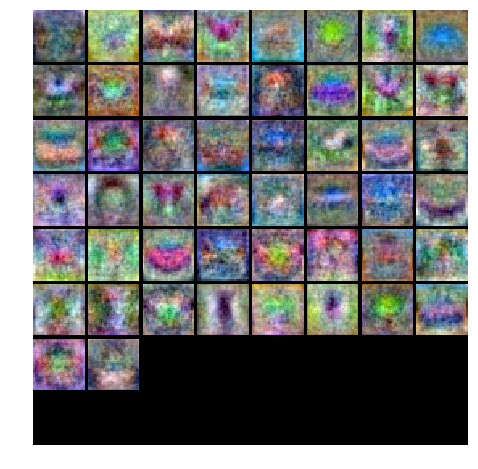

In [38]:
#上述方法图像不清晰 写一个函数设置一下padding
from vis_utils import visualize_grid
W1 = net.params['W1']

W1 = W1.reshape(32,32,3,-1).transpose(3, 0, 1, 2)
plt.imshow(visualize_grid(W1,padding = 2).astype('uint8'))
plt.axis('off')
plt.show()